In [1]:
from pypylon import pylon
import pytesseract
from matplotlib import pyplot as plt
import cv2
import easyocr
from paddleocr import PaddleOCR
from ppocr.utils.logging import get_logger
import logging
logger = get_logger()
logger.setLevel(logging.ERROR)
reader = easyocr.Reader(['en']) 
ocr = PaddleOCR(lang='en')
import numpy as np

In [182]:
img = pylon.PylonImage()
tlf = pylon.TlFactory.GetInstance()
converter = pylon.ImageFormatConverter()
converter.OutputPixelFormat = pylon.PixelType_RGB8packed
cam = pylon.InstantCamera(tlf.CreateFirstDevice())
cam.Open()
cam.StartGrabbing()
with cam.RetrieveResult(2000) as result:
    image = converter.Convert(result)
    img_cap = image.GetArray()
cam.StopGrabbing()
cam.Close()

In [191]:
rot_img = img_cap
# for i in range(1):
#     rot_img = cv2.rotate(img_cap, cv2.ROTATE_90_CLOCKWISE)
rot_img = cv2.rotate(rot_img, cv2.ROTATE_90_CLOCKWISE)
# rot_img = cv2.rotate(rot_img, cv2.ROTATE_90_CLOCKWISE)
# rot_img = cv2.rotate(rot_img, cv2.ROTATE_90_CLOCKWISE)


#rot_img = img_cap
# result = ocr.ocr(rot_img, cls=False)

# for idx in range(len(result)):
#     res = result[idx]
#     if res != None:
#         for line in res:
#             print("From Paddle",line[1][0])

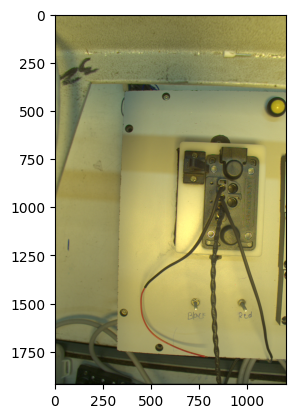

In [192]:
plt.imshow(rot_img)

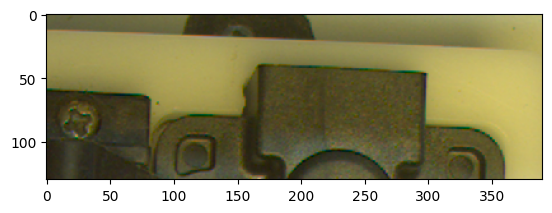

In [194]:
#crop_img = rot_img[1150:1350,400:700]
# crop_img = rot_img[0:250,850:1210]
#crop_img = rot_img[180:290,750:1250] # Top Marking
#crop_img = rot_img[160:290,500:1400] 
#crop_img = rot_img[180:290,750:1250] # Bottom Marking

#crop_img = rot_img[830:950,150:390] # side
crop_img = rot_img[750:850,150:390] # side

crop_img = rot_img[650:780,700:1090] # side



# crop_img = rot_img[100,900,220:450] # side




plt.imshow(crop_img)

#print("From EasyOCR",reader.readtext(crop_img, detail = 0,allowlist='0123456789'))



result = ocr.ocr(crop_img, cls=False)



for idx in range(len(result)):
    res = result[idx]
    if res != None:
        for line in res:
            print("From Paddle",line[1][0])

crop_gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
plt.imshow(crop_gray)
reader.readtext(crop_gray, detail = 0,allowlist='0123456789')

In [10]:
result = ocr.ocr('test1.jpg', cls=False)


In [11]:
result

[[[[[55.0, 21.0], [380.0, 21.0], [380.0, 31.0], [55.0, 31.0]],
   ('APPROXIMATE GROSSINTERNAL FLOOR AREA 714 SQ.FT (66.4 SQ.M)',
    0.9352434277534485)],
  [[[265.0, 140.0], [318.0, 140.0], [318.0, 150.0], [265.0, 150.0]],
   ('BEDROOM2', 0.9900367259979248)],
  [[[76.0, 156.0], [128.0, 156.0], [128.0, 166.0], [76.0, 166.0]],
   ('BEDROOMI', 0.966252326965332)],
  [[[265.0, 150.0], [319.0, 150.0], [319.0, 160.0], [265.0, 160.0]],
   ('3.0mX3.4m', 0.9234587550163269)],
  [[[75.0, 165.0], [130.0, 166.0], [130.0, 177.0], [74.0, 176.0]],
   ('2.8mX4.4m', 0.9308430552482605)],
  [[[264.0, 161.0], [319.0, 161.0], [319.0, 171.0], [264.0, 171.0]],
   ('9.8X11.1ft', 0.7697844505310059)],
  [[[76.0, 177.0], [131.0, 177.0], [131.0, 187.0], [76.0, 187.0]],
   ('9.2ftX144ft', 0.8051121234893799)],
  [[[291.0, 360.0], [332.0, 360.0], [332.0, 370.0], [291.0, 370.0]],
   ('KITCHEN', 0.9953742027282715)],
  [[[286.0, 370.0], [337.0, 370.0], [337.0, 380.0], [286.0, 380.0]],
   ('2.6mX2.6 m', 0.92089116

In [12]:
for idx in range(len(result)):
    res = result[idx]
    if res != None:
        for line in res:
            print(line[1][0])

APPROXIMATE GROSSINTERNAL FLOOR AREA 714 SQ.FT (66.4 SQ.M)
BEDROOM2
BEDROOMI
3.0mX3.4m
2.8mX4.4m
9.8X11.1ft
9.2ftX144ft
KITCHEN
2.6mX2.6 m
RECEPTION
8.5X8.5
4.0mX4.4 m
13.1 ft X14.4ft
NTRANCE
THIRDFLOOR
